In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [193]:
df = pd.read_csv('echocardiogram.data')

In [194]:
df.head()

,11,0,71,0.1,0.260,9,4.600,14,1,1.1,name,1.2,0.2
0,19.0,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
1,16.0,0,55,0,0.260,4,3.420,14,1,1,name,1,0
2,57.0,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
3,19.0,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
4,26.0,0,68,0,0.260,5,4.310,12,1,0.857,name,1,0


Renaming the columns to the variables listed in the .name file

In [195]:
df.columns = ['Months Survived', 'Alive?', 'Age of HA', 'Pericardinal Effusion',
            'Fraction Shortening', 'EPSS', 'LVDD', 'Wall Motion Score', 'Wall Motion Index',
             'Mult', 'Name', 'Group', 'Alive after Year 1']

In [196]:
df.head()

,Months Survived,Alive?,Age of HA,Pericardinal Effusion,Fraction Shortening,EPSS,LVDD,Wall Motion Score,Wall Motion Index,Mult,Name,Group,Alive after Year 1
0,19.0,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
1,16.0,0,55,0,0.260,4,3.420,14,1,1,name,1,0
2,57.0,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
3,19.0,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
4,26.0,0,68,0,0.260,5,4.310,12,1,0.857,name,1,0


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 13 columns):
Months Survived          109 non-null float64
Alive?                   109 non-null int64
Age of HA                109 non-null object
Pericardinal Effusion    109 non-null int64
Fraction Shortening      109 non-null object
EPSS                     109 non-null object
LVDD                     109 non-null object
Wall Motion Score        109 non-null object
Wall Motion Index        109 non-null object
Mult                     109 non-null object
Name                     109 non-null object
Group                    109 non-null object
Alive after Year 1       109 non-null object
dtypes: float64(1), int64(2), object(10)
memory usage: 11.1+ KB


The first step in cleaning this data I will be taking is to remove all patients who are still alive, but have been alive less than 2 years

In [198]:
df.drop(df[(df['Alive?']==1) & (df['Months Survived']<24)].index, axis = 0 , inplace = True )

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 108
Data columns (total 13 columns):
Months Survived          70 non-null float64
Alive?                   70 non-null int64
Age of HA                70 non-null object
Pericardinal Effusion    70 non-null int64
Fraction Shortening      70 non-null object
EPSS                     70 non-null object
LVDD                     70 non-null object
Wall Motion Score        70 non-null object
Wall Motion Index        70 non-null object
Mult                     70 non-null object
Name                     70 non-null object
Group                    70 non-null object
Alive after Year 1       70 non-null object
dtypes: float64(1), int64(2), object(10)
memory usage: 7.7+ KB


This represented losing a fairly big chunk of our data and there is still more cleaning to do. 'Name', 'Mult', and 'Group' are redundant variables as described in the .name file. We are also only really concered if the person lived 24 months after the incident so 'Alive after Year 1' is also redundant.

In [200]:
df.drop(['Name', 'Mult', 'Group', 'Alive after Year 1'], axis = 1, inplace = True)

There are no labelled null variables in this data set, however there are several places where a value is replaced by a '?'. These must be cleaned

In [201]:
df[(df['Wall Motion Score']== '?') | (df['EPSS']== '?') | (df['Fraction Shortening']== '?' ) | (df['Wall Motion Index']== '?')].count()

Months Survived          11
Alive?                   11
Age of HA                11
Pericardinal Effusion    11
Fraction Shortening      11
EPSS                     11
LVDD                     11
Wall Motion Score        11
Wall Motion Index        11
dtype: int64

This will cause us to lose another 11 rows of our data set. Some of these rows could be recovered with domain knowledge but I am not a doctor so I do not have any. Setting them to zero is also an option but because the data set is so small I feel it would be dangerous to do so.

In [202]:
df.drop(df[(df['Wall Motion Score']== '?') | (df['EPSS']== '?') | (df['Fraction Shortening']== '?' ) | (df['Wall Motion Index']== '?')].index, axis = 0 , inplace = True )

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 108
Data columns (total 9 columns):
Months Survived          59 non-null float64
Alive?                   59 non-null int64
Age of HA                59 non-null object
Pericardinal Effusion    59 non-null int64
Fraction Shortening      59 non-null object
EPSS                     59 non-null object
LVDD                     59 non-null object
Wall Motion Score        59 non-null object
Wall Motion Index        59 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 4.6+ KB


Now we specifically only care whether or not the person has survived 24 months post heart attack, so let's generate a column to see that.

In [204]:
two_years =[]
for row in df['Months Survived']:
    if row >= 24:
        two_years.append(1)
    else:
        two_years.append(0)
df['Survived Two Years'] = two_years

In [205]:
df['Survived Two Years'].value_counts()

1    44
0    15
Name: Survived Two Years, dtype: int64

Our data is almost set, now we just have to remove the last of the redundant columns for ease of use.

In [206]:
df.drop(['Months Survived','Alive?'], axis = 1, inplace = True)

In [207]:
df.head()

,Age of HA,Pericardinal Effusion,Fraction Shortening,EPSS,LVDD,Wall Motion Score,Wall Motion Index,Survived Two Years
0,72,0,0.380,6,4.100,14,1.700,0
1,55,0,0.260,4,3.420,14,1,0
2,60,0,0.253,12.062,4.603,16,1.450,1
4,68,0,0.260,5,4.310,12,1,1
5,62,0,0.230,31,5.430,22.5,1.875,0


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 108
Data columns (total 8 columns):
Age of HA                59 non-null object
Pericardinal Effusion    59 non-null int64
Fraction Shortening      59 non-null object
EPSS                     59 non-null object
LVDD                     59 non-null object
Wall Motion Score        59 non-null object
Wall Motion Index        59 non-null object
Survived Two Years       59 non-null int64
dtypes: int64(2), object(6)
memory usage: 4.1+ KB


We also need to convert the columns that are listed as objects to a numeric data type for ease of plotting

In [209]:
df['Age of HA']=pd.to_numeric(df['Age of HA'])
df['Fraction Shortening']=pd.to_numeric(df['Fraction Shortening'])
df['EPSS']=pd.to_numeric(df['EPSS'])
df['LVDD']=pd.to_numeric(df['LVDD'])
df['Wall Motion Score']=pd.to_numeric(df['Wall Motion Score'])
df['Wall Motion Index']=pd.to_numeric(df['Wall Motion Index'])

We now have our data clean and ready to go let's look for some common trends within it.

In [210]:
df.columns

Index(['Age of HA', 'Pericardinal Effusion', 'Fraction Shortening', 'EPSS',
       'LVDD', 'Wall Motion Score', 'Wall Motion Index', 'Survived Two Years'],
      dtype='object')

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 108
Data columns (total 8 columns):
Age of HA                59 non-null int64
Pericardinal Effusion    59 non-null int64
Fraction Shortening      59 non-null float64
EPSS                     59 non-null float64
LVDD                     59 non-null float64
Wall Motion Score        59 non-null float64
Wall Motion Index        59 non-null float64
Survived Two Years       59 non-null int64
dtypes: float64(5), int64(3)
memory usage: 4.1 KB


In [212]:
df['Survived Two Years'].value_counts()

1    44
0    15
Name: Survived Two Years, dtype: int64

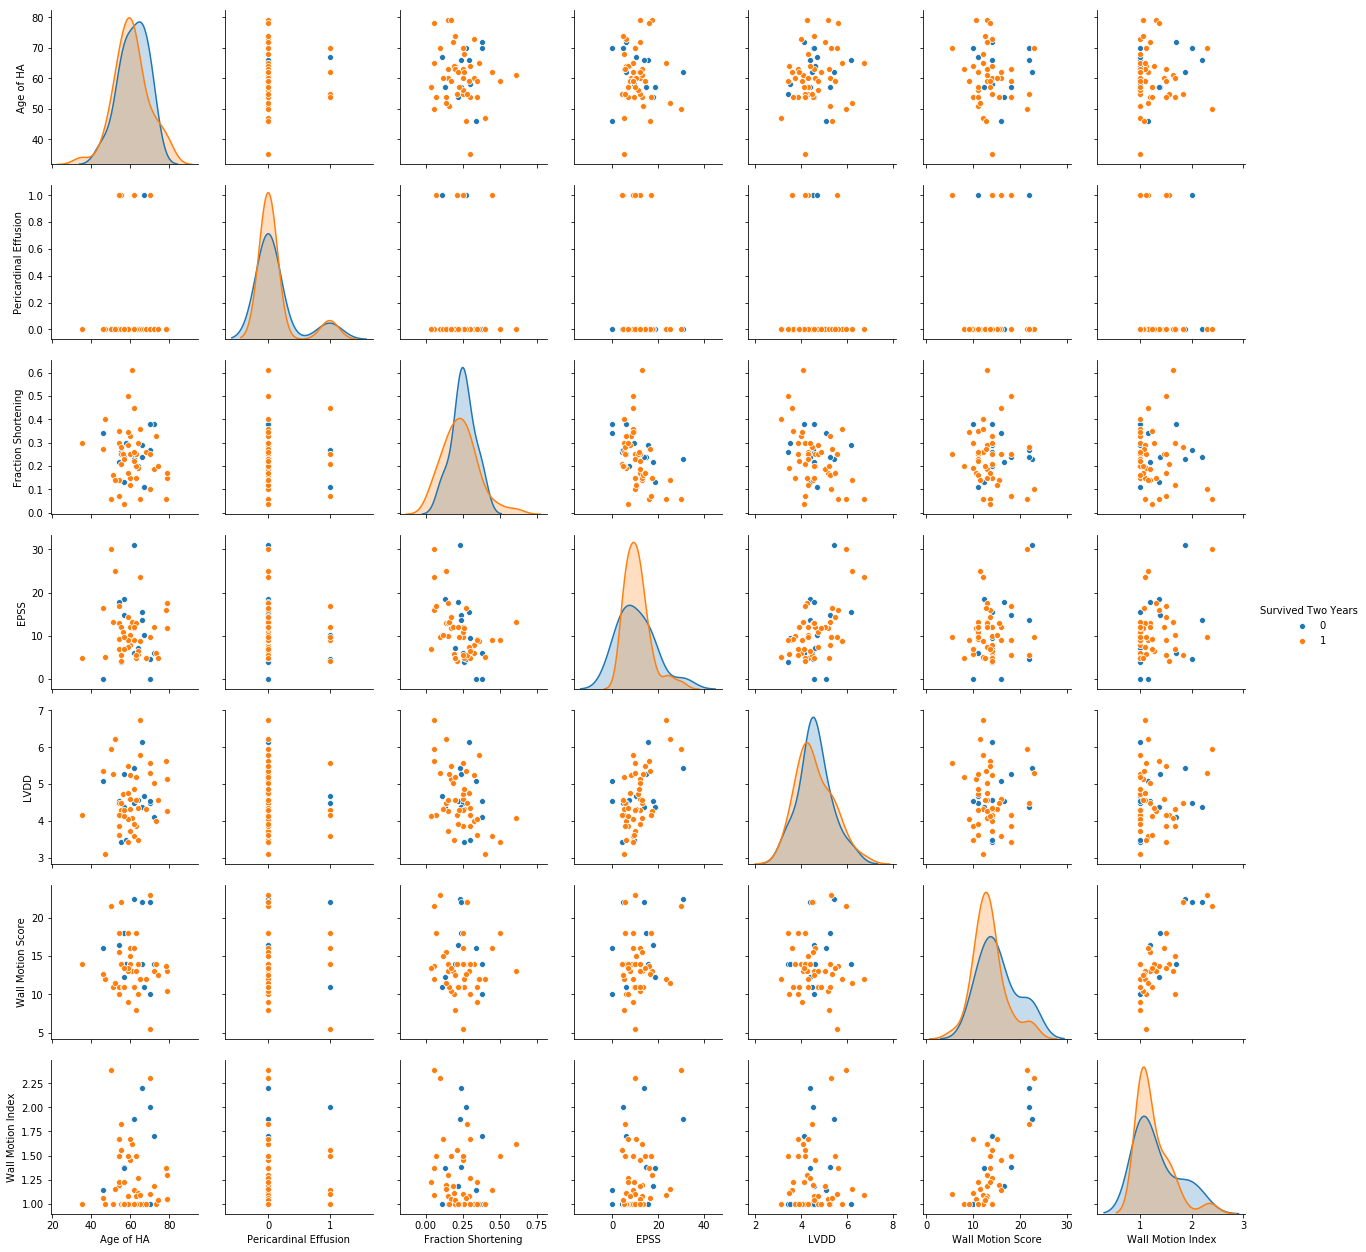

In [213]:
sns.pairplot(data=df,vars=('Age of HA', 'Pericardinal Effusion', 'Fraction Shortening', 'EPSS',
       'LVDD', 'Wall Motion Score', 'Wall Motion Index'), hue = 'Survived Two Years')

We cannot really derive much from this and I have a feeling it's because the data has not yet been scaled. So we'll scale that data and plot it again.

In [214]:
from sklearn.preprocessing import StandardScaler

In [215]:
X=df.drop(['Survived Two Years', 'Pericardinal Effusion'], axis = 1)

In [216]:
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

c:\users\spencer\anaconda3\envs\jacktor\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\spencer\anaconda3\envs\jacktor\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [217]:
df['Age of HA'] = X[:,0]
df['Fraction Shortening']=X[:,1]
df['EPSS']=X[:,2]
df['LVDD']=X[:,3]
df['Wall Motion Score']=X[:,4]
df['Wall Motion Index']=X[:,5]

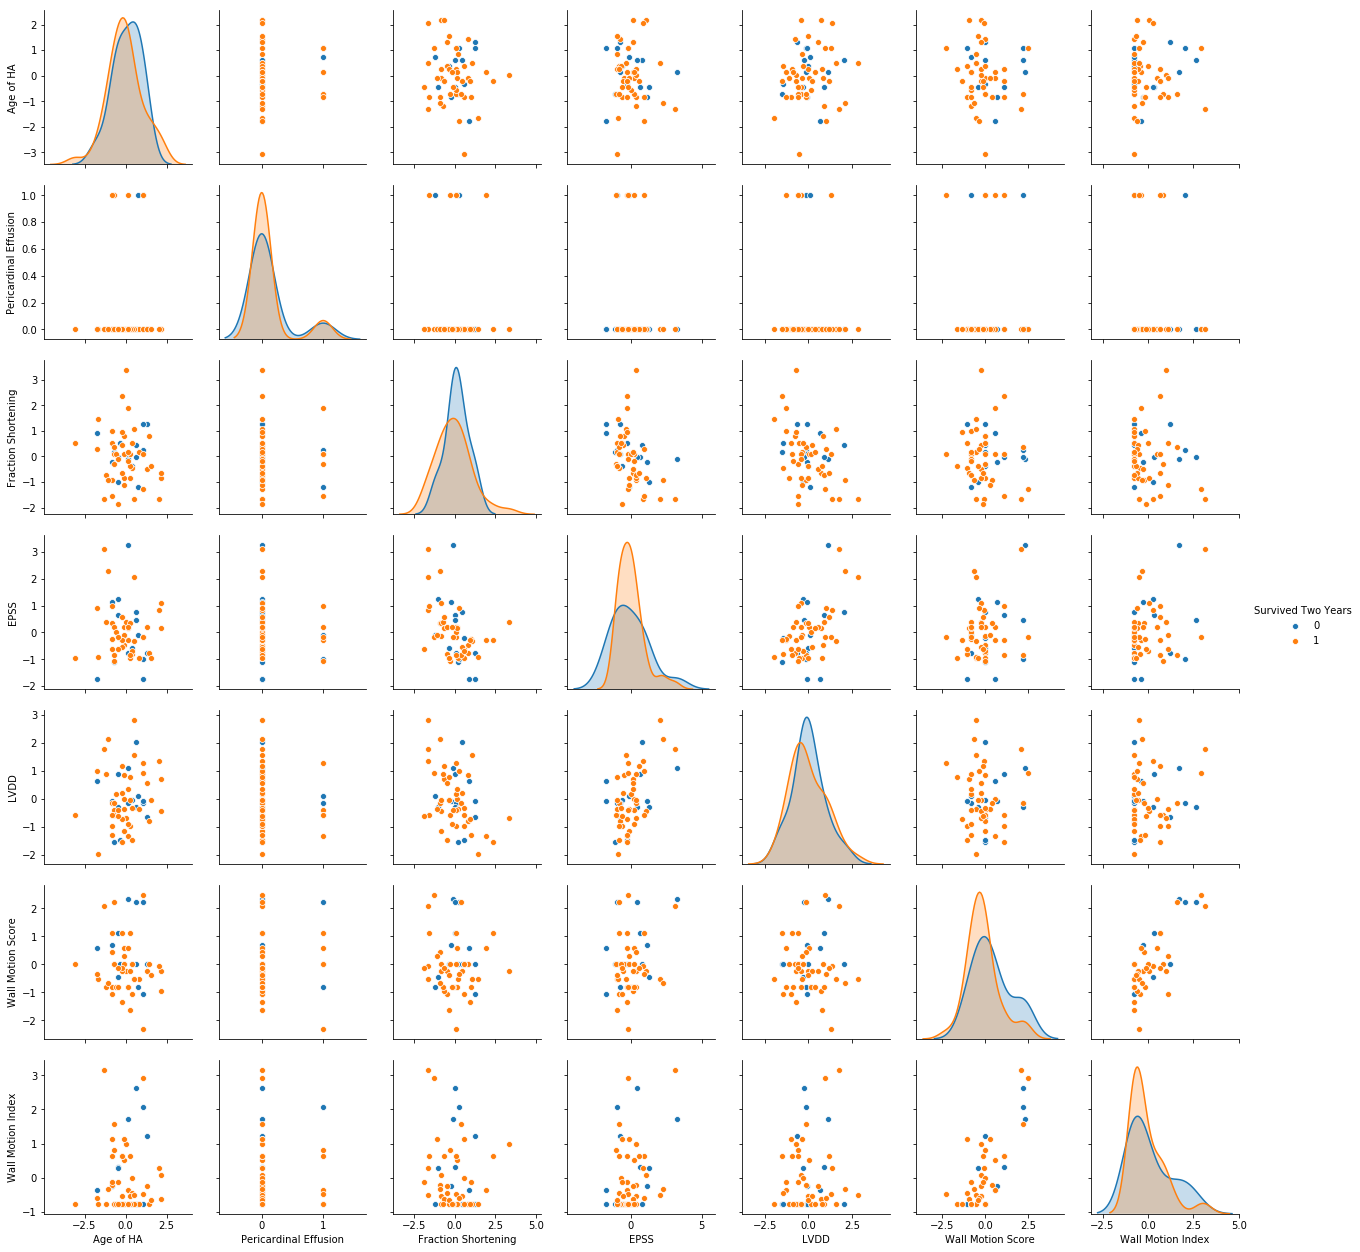

In [218]:
sns.pairplot(data=df,vars=('Age of HA', 'Pericardinal Effusion', 'Fraction Shortening', 'EPSS',
       'LVDD', 'Wall Motion Score', 'Wall Motion Index'), hue = 'Survived Two Years')

Unfortunately that did not help much, but at least it's still scaled so that'll help us in the long run.

In [219]:
from sklearn.model_selection import train_test_split

In [251]:
df_test = pd.read_csv('echocardiogram.test', sep=',', header=None)

In [221]:
X_train = df.drop('Survived Two Years', axis = 1)
y_train = df['Survived Two Years']

In [222]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [225]:
clf = svm.SVC(kernel='linear', C=1)

In [237]:
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision')
scores

array([0.75      , 0.75      , 0.75      , 0.72727273, 0.72727273])

In [252]:
df_test.drop([0,1,9,10,11,12], axis = 1, inplace=True)

In [253]:
df_test.drop([4,7,13], axis = 0, inplace = True)

In [261]:
X=df_test.drop(3, axis = 1)
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

c:\users\spencer\anaconda3\envs\jacktor\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\spencer\anaconda3\envs\jacktor\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [264]:
df_test[3]=pd.to_numeric(df_test[3])

In [266]:
df_test

,2,3,4,5,6,7,8
0,61,0,0.27,9.0,4.06,12.0,1.000
1,59,1,0.40,9.2,5.36,12.0,1.000
2,57,0,0.29,9.4,4.77,9.0,1.000
3,62,1,0.19,28.9,6.63,19.5,1.950
5,54,0,0.43,9.3,4.79,10.0,1.000
6,62,1,0.24,28.6,5.86,21.5,1.950
8,64,0,0.15,6.6,4.17,14.0,1.270
9,57,1,0.12,0.0,2.32,16.5,1.375
10,61,0,0.18,0.0,4.48,11.0,1.375
11,61,1,0.19,13.2,5.04,19.0,1.730


In [268]:
df_test[2] = X[:,0]
df_test[4]=X[:,1]
df_test[5]=X[:,2]
df_test[6]=X[:,3]
df_test[7]=X[:,4]
df_test[8]=X[:,5]

In [269]:
df_test

,2,3,4,5,6,7,8
0,0.180860,0,0.559230,-0.268087,-0.733515,-0.546392,-0.945046
1,-0.258371,1,2.048265,-0.245356,0.689723,-0.546392,-0.945046
2,-0.697602,0,0.788312,-0.222626,0.043792,-1.403808,-0.945046
3,0.400475,1,-0.357099,1.993602,2.080118,1.597146,2.108063
5,-1.356449,0,2.391888,-0.233991,0.065688,-1.118002,-0.945046
6,0.400475,1,0.215607,1.959507,1.237123,2.168757,2.108063
8,0.839706,0,-0.815263,-0.540853,-0.613087,0.025218,-0.077320
9,-0.697602,1,-1.158887,-1.290961,-2.638465,0.739731,0.260129
10,0.180860,0,-0.471640,-1.290961,-0.273700,-0.832197,0.260129
11,0.180860,1,-0.357099,0.209255,0.339388,1.454244,1.401027


In [249]:
clf.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [270]:
clf.predict(df_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [271]:
from sklearn.ensemble import RandomForestClassifier

In [274]:
RFC = RandomForestClassifier(n_estimators=20)

In [275]:
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [276]:
RFC.predict(df_test)

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)